In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


%load_ext autoreload
%autoreload 2

## To Do:

1. Implement the Abelian Sandpile model and simulate its dynamics. I've included a template of the iterative solution below, although feel free to re-factor if you would prefer to implement the problem a different way. To my knowledge, there are three different ways to implement the Abelian sandpile:
    + The iterative solution involves adding a grain and then repeatedly checking the lattice for piles to topple
    + The recursive depth-first-search solution adds a grain and then traces the avalanche that results from each grain toppled by the initial addition.
    + The breadth-first-search solution adds a grain and then simultaneously tracks the four potential avalanches that result from that single grain.
2. Using the code included below, show that avalanche durations exhibit a $1/T^\alpha$ distribution, where $\alpha$ is some constant.
3. If a single image of the sandpile has size $N$ (the total number of lattice sites), what do you expect to be the worst-case scaling of the runtime of your algorithm? What about the expected scaling of memory usage?
4. You may have noticed that the waiting time and avalanche size distribution exhibit anomalous scaling in their tails, as visible as a small second peak near the extreme end of the distribution. What causes this effect?

The anomalous second peak in the distribution of avalanche durations is likely due to boundary effects. When avalanches reach the edge of the grid, grains are "lost" because of the absorbing boundary conditions, which reduces the size and duration of avalanches. This can cause a second peak at the high end of the distribution, where large avalanches are suppressed by the boundaries.
5. (Hard, optional) Try [vectorizing](https://realpython.com/numpy-array-programming/) your sandpile implementation, in order to reduce the number of "for" loops used in your implementation. How does vectorization affect the runtime?

**If any experienced student wants to try to implement the Kramer & Marder paper discussed below instead of doing the BTK model, feel free to attempt it. I don't have a solution for it, but I would love to see one.**

In [9]:
class AbelianSandpile:
    """
    An Abelian sandpile model simulation. The sandpile is initialized with a random
    number of grains at each lattice site. Then, a single grain is dropped at a random
    location. The sandpile is then allowed to evolve until it is stable. This process
    is repeated n_step times.

    A single step of the simulation consists of two stages: a random sand grain is
    dropped onto the lattice at a random location. Then, a set of avalanches occurs
    causing sandgrains to get redistributed to their neighboring locations.

    Parameters:
    n (int): The size of the grid
    grid (np.ndarray): The grid of the sandpile
    history (list): A list of the sandpile grids at each timestep
    """

    def __init__(self, n=100, random_state=None):
        self.n = n
        np.random.seed(random_state) # Set the random seed
        self.grid = np.random.choice([0, 1, 2, 3], size=(n, n))
        self.history =[self.grid.copy()] # Why did we need to copy the grid? 
        #A: To store history of states


    def step(self):
        """
        Perform a single step of the sandpile model. Step corresponds a single sandgrain
        addition and the consequent toppling it causes.

        Returns: None
        """
        ########## YOUR CODE HERE ##########
        #raise NotImplementedError
        #
        #
        # My solution starts by dropping a grain, and then solving for all topple events
        # until the sandpile is stable. Watch your boundary conditions carefully.
        # We will use absorbing boundary conditions: excess sand grains fall off the edges
        # of the grid.
        #
        #
    # Add a grain at a random location
        x, y = np.random.randint(0, self.n, size=2)
        self.grid[x, y] += 1

        # Topple until stable
        while np.any(self.grid >= 4):  # Topple while any site exceeds 3 grains
            for i in range(self.n):
                for j in range(self.n):
                    if self.grid[i, j] >= 4:
                        # Topple this site
                        self.grid[i, j] -= 4
                        # Distribute grains to neighbors
                        if i > 0:
                            self.grid[i - 1, j] += 1
                        if i < self.n - 1:
                            self.grid[i + 1, j] += 1
                        if j > 0:
                            self.grid[i, j - 1] += 1
                        if j < self.n - 1:
                            self.grid[i, j + 1] += 1

        # Store the current state in history
        self.history.append(self.grid.copy())


        ########## YOUR CODE HERE ##########


    # we use this decorator for class methods that don't require any of the attributes
    # stored in self. Notice how we don't pass self to the method
    @staticmethod
    def check_difference(grid1, grid2):
        """Check the total number of different sites between two grids"""
        return np.sum(grid1 != grid2)


    def simulate(self, n_step):
        """
        Simulate the sandpile model for n_step steps.
        """
        ########## YOUR CODE HERE ##########
        # raise NotImplementedError
        for _ in range(n_step):
            self.step()
        


In [11]:
def plot_avalanche_durations(self):
        """
        Plot the avalanche duration distribution and fit a power-law curve.
        """
        durations = np.array(self.avalanche_durations)
        
        # Plot histogram on log-log scale
        plt.hist(durations, bins=np.logspace(np.log10(1), np.log10(max(durations)), 50), density=True)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Duration (T)')
        plt.ylabel('Probability')
        plt.title('Avalanche Duration Distribution')
        plt.show()

        # Fit the distribution to a power law: P(T) = T^(-alpha)
        def power_law(x, alpha, C):
            return C * x ** (-alpha)

        # Use curve fitting to estimate the exponent
        hist, bin_edges = np.histogram(durations, bins=50, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        popt, _ = curve_fit(power_law, bin_centers[hist > 0], hist[hist > 0])

        alpha = popt[0]
        print(f"Estimated power-law exponent (alpha): {alpha}")

        # Plot the fitted power law
        plt.plot(bin_centers, power_law(bin_centers, *popt), label=f'Fit: T^(-{alpha:.2f})')
        plt.legend()
        plt.show()

In [2]:
# Check if the "solutions" directory exists. If not, create it and download the solution file
import os
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')
!wget -P solutions https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/sandpile.py

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


Text(0.5, 1.0, 'Avalanche activity in most recent timesteps')

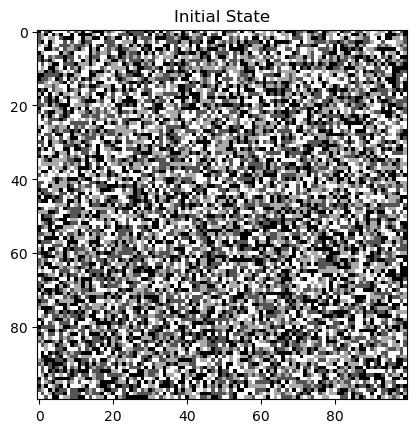

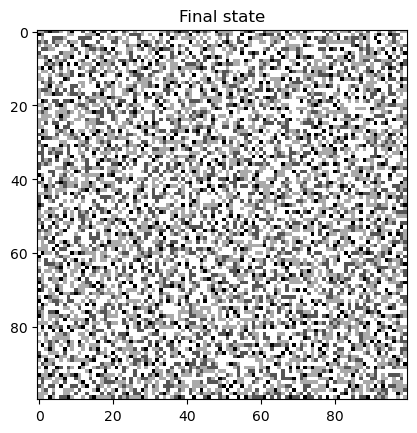

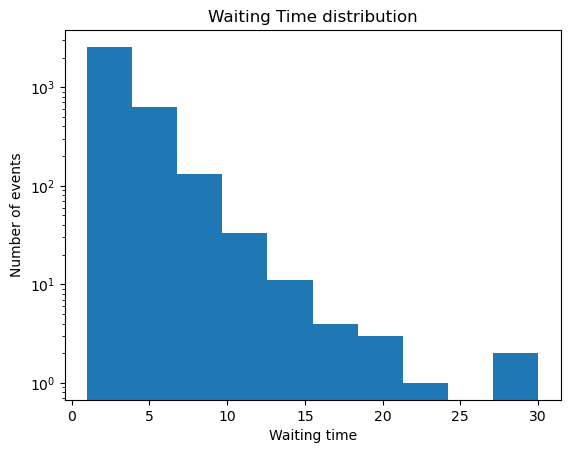

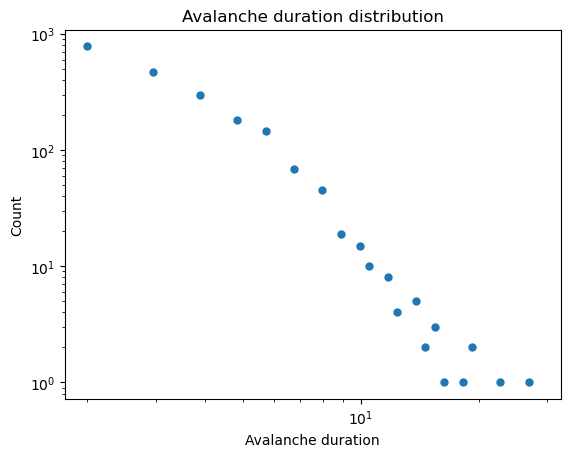

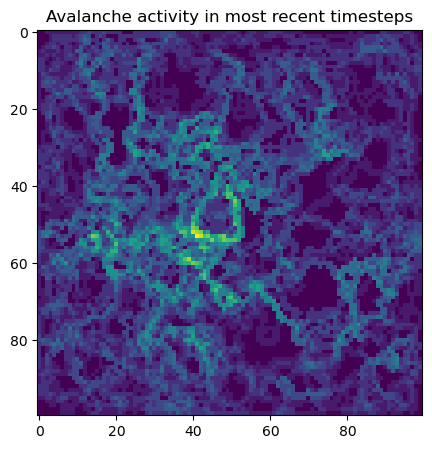

In [10]:
## Import William's solution from answer key
# from solutions.sandpile import AbelianSandpileIterative as AbelianSandpile
# from solutions.sandpile import AbelianSandpileBFS as AbelianSandpile
# from solutions.sandpile import AbelianSandpileDFS as AbelianSandpile


# Run sandpile simulation
model = AbelianSandpile(n=100, random_state=0)

plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Initial State")

model.simulate(10000)
plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Final state")




# Compute the pairwise difference between all observed snapshots. This command uses list
# comprehension, a zip generator, and argument unpacking in order to perform this task
# concisely.
all_events =  [model.check_difference(*states) for states in zip(model.history[:-1], model.history[1:])]
# remove transients before the self-organized critical state is reached
all_events = all_events[1000:]
# index each timestep by timepoint
all_events = list(enumerate(all_events))
# remove cases where an avalanche did not occur
all_avalanches = [x for x in all_events if x[1] > 1]
all_avalanche_times = [item[0] for item in all_avalanches]
all_avalanche_sizes = [item[1] for item in all_avalanches]
all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


## Waiting time distribution
waiting_times = np.diff(np.array(all_avalanche_times))
plt.figure()
plt.semilogy()
plt.hist(waiting_times)
plt.title('Waiting Time distribution')
plt.xlabel('Waiting time')
plt.ylabel('Number of events')

## Duration distribution
log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
plt.figure()
plt.loglog(bins[:-1], vals, '.', markersize=10)
plt.title('Avalanche duration distribution')
plt.xlabel('Avalanche duration')
plt.ylabel('Count')

## Visualize activity of the avalanches
# Make an array storing all pairwise differences between the lattice at successive
# timepoints
all_diffs = np.abs(np.diff(np.array(model.history), axis=0))
all_diffs[all_diffs > 0] = 1
all_diffs = all_diffs[np.sum(all_diffs, axis=(1, 2)) > 1] # Filter to only keep big events
most_recent_events = np.sum(all_diffs[-100:], axis=0)
plt.figure(figsize=(5, 5))
plt.imshow(most_recent_events)
plt.title("Avalanche activity in most recent timesteps")